In [ ]:
# for Tensorflow:

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
tf.version.VERSION

In [ ]:
ecg_raw = pd.read_csv("data.csv")
ecg_raw.shape
ecg_nk = ecg_raw["ECG_Clean"] # neurokit sorgt für komische Werte am Anfang & Ende TODO
ecg = ecg_nk[5000:55000] # nur mit Untermenge auf Laptop
ecg.ndim
ecg.shape
#plt.plot(ecg)
print(type(ecg))
ecg = ecg.to_numpy(dtype="float32")
print(type(ecg))
print(ecg)
ecg.dtype
ecg.shape

In [ ]:
# Code from Brownlee 2018

# univariate multi-step vector-output stacked lstm example
from numpy import array
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [17]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        if i % 500 == 0: # to reduce redundancy
            # find the end of this pattern
            end_ix = i + n_steps_in
            out_end_ix = end_ix + n_steps_out
            # check if we are beyond the sequence
            if out_end_ix > len(sequence):
                break
            # gather input and output parts of the pattern
            seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
            X.append(seq_x)
            y.append(seq_y)
    return array(X), array(y)

# choose a number of time steps
n_steps_in, n_steps_out = 10*1000, 1*1000
# split into samples
X, y = split_sequence(ecg, n_steps_in, n_steps_out)
# summarize the data
print(len(ecg))
print(X.shape,y.shape)

50000
(79, 10000) (79, 1000)


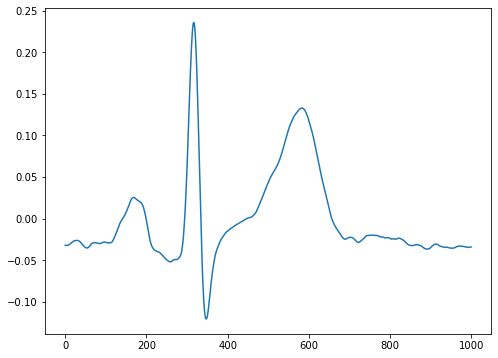

In [21]:
fig = plt.plot(y[3,:])

In [31]:
# "The LSTM expects data to have a three-dimensional structure of [samples, timesteps, features]"
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = y.reshape((y.shape[0], y.shape[1], n_features))
print(X.shape,y.shape)
#plt.plot(y[3,:,0])
print(type(X))

(79, 10000, 1) (79, 1000, 1)
<class 'numpy.ndarray'>


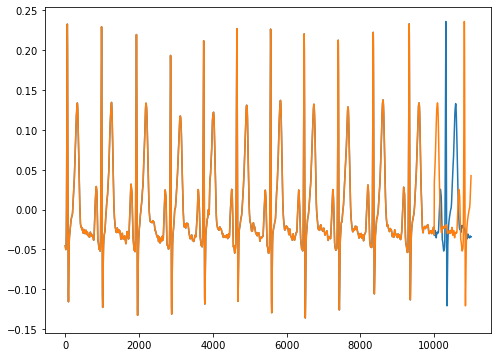

In [38]:
test = np.append(X[3,:,0], y[3,:,0])
test2 = np.append(X[3,:,0], y[2,:,0])
plt.plot(test)
plt.plot(test2)

In [ ]:
# Data split

